In [1]:
#Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [2]:
#Read highspeend training and virtual college ppc data
df_v = pd.read_excel('virtual-college.co.uk-adwords.Positions-uk-20191111-2019-11-12T06_05_40Z.xlsx')
df_h = pd.read_excel('highspeedtraining.co.uk-adwords.Positions-uk-20191111-2019-11-12T06_04_51Z.xlsx')

In [3]:
# Take a look at the 1st df
df_v.head()

,Title,Description,Keyword,Position,Previous position,Search Volume,CPC,Visible URL,URL,Traffic,Traffic (%),Traffic Cost,Competition,Number of Results,Trends,Last Seen,Keyword Difficulty
0,Food and Hygiene Course Online | Basic to Adva...,Food Hygiene Training Courses Online - Leading...,food hygiene,1,1,18100,2.96,www.virtual-college.co.uk/,http://www.virtual-college.co.uk/,850,21.04,2518,0.38,240000000,"82,82,67,67,67,67,67,82,67,100,82,82",2019-11-09 07:51:28,76.43
1,NaN,Meet The UK Training Requirements For Food Han...,food hygiene,1,1,18100,2.96,www.virtual-college.co.uk/Food-Hygiene,http://www.virtual-college.co.uk/Food-Hygiene,850,21.04,2518,0.38,269000000,"82,82,67,67,67,67,67,82,67,100,82,82",2019-11-10 08:07:55,76.45
2,Virtual College E-Learning | City & Guilds Acc...,Online Courses Starting From Only £10! Learn O...,virtual college,1,1,12100,0.74,www.virtual-college.co.uk/,http://www.virtual-college.co.uk/,568,14.06,420,0.28,416000000,"82,82,67,82,67,82,82,82,45,100,82,82",2019-11-10 22:22:12,86.19
3,Food and Hygiene Course Online | Basic to Adva...,Food Hygiene Training Courses Online - Leading...,food hygiene,2,0,18100,2.96,www.virtual-college.co.uk/,http://www.virtual-college.co.uk/,235,5.81,696,0.38,240000000,"82,82,67,67,67,67,67,82,67,100,82,82",2019-11-11 07:15:28,78.43
4,Level 2 Food Hygiene Courses | Quick & Afforda...,Food Hygiene Courses From £12 at Virtual Colle...,food hygiene level 2,1,1,4400,8.30,www.virtual-college.co.uk/,http://www.virtual-college.co.uk/,206,5.10,1716,0.87,135000000,"100,67,54,67,100,81,67,81,35,100,100,81",2019-11-04 17:08:37,66.86


In [4]:
#Create a function to process and clean the text data
def process_variables(data):
    # Remove nans to avoid dtypes error
    data.dropna(subset=['Title','Description'],inplace=True)
    
    #Calculate description character length
    data['des_char_len']= data['Description'].str.len()
    
    #Drop rows where length of description is greater the 180 character
    to_drop = data.loc[data.des_char_len>180].index
    data.drop(to_drop,axis=0,inplace=True)
    data = data.reset_index(drop=True)
    
    #Remove |, & from title and desciption
    data['Title'] = data['Title'].str.replace('|','').str.replace('&','')
    data['Description'] = data['Description'].str.replace('&','')
    
    # Now remove stop words from title and decription
    data['title_stop'] = data['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    data['des_stop'] = data['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    return data




# Function to display bar labels in bar plot
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Words Count', fontsize = font_size)
    plt.xticks(rotation = 90, fontsize = font_size)
    plt.yticks([])
    
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'red')
        
def absolute_freq(variable,title):
    global  ax
    
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts().head(30)
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency})
    # This portion plots absolute frequency with bar labeled.
    fig_size = (18,8)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = title, figsize = fig_size,color ='teal')
    ax.title.set_size(title_size)
    abs_bar_labels()  # Displays bar labels in abs scale.
    sns.despine()

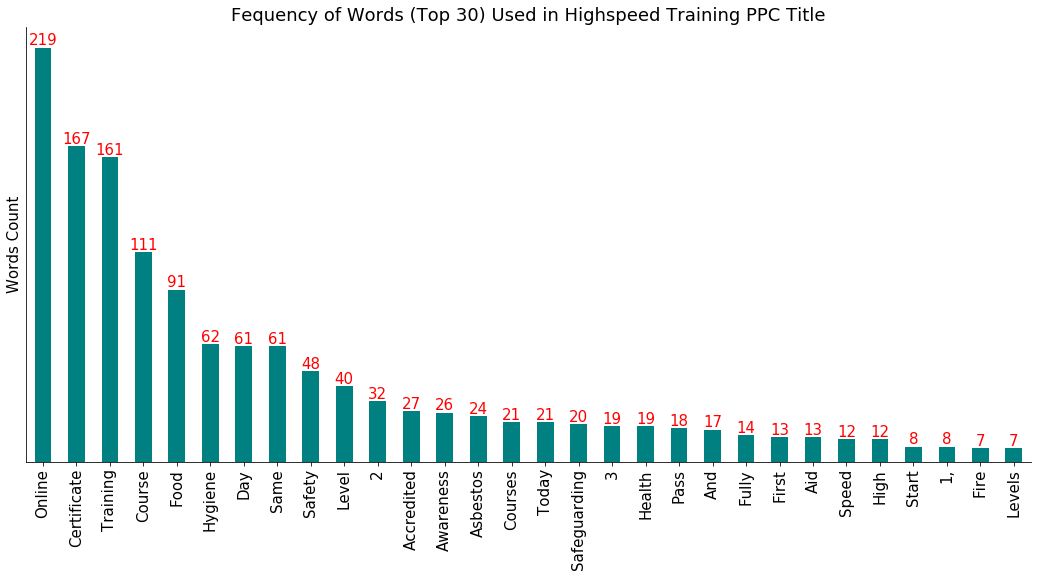

In [5]:
#Fequency of words in highspeed training ppc title
df_h = process_variables(df_h)
absolute_freq(df_h.title_stop.str.split(expand=True).stack(),'Fequency of Words (Top 30) Used in Highspeed Training PPC Title')

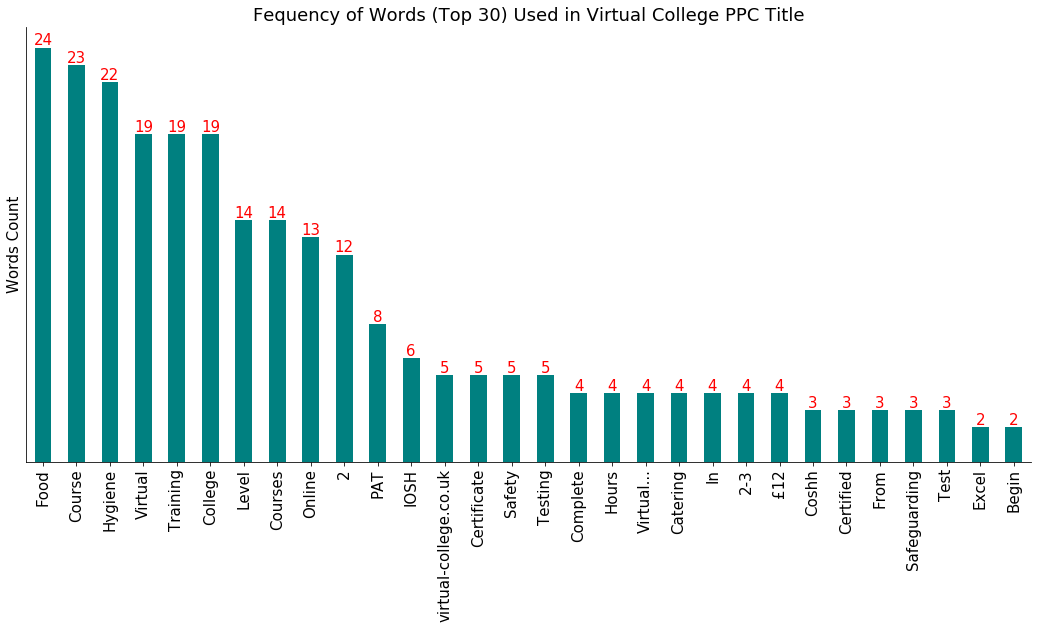

In [6]:
#Fequency of words in virtual college ppc title
df_v = process_variables(df_v)
absolute_freq(df_v.title_stop.str.split(expand=True).stack(),'Fequency of Words (Top 30) Used in Virtual College PPC Title')

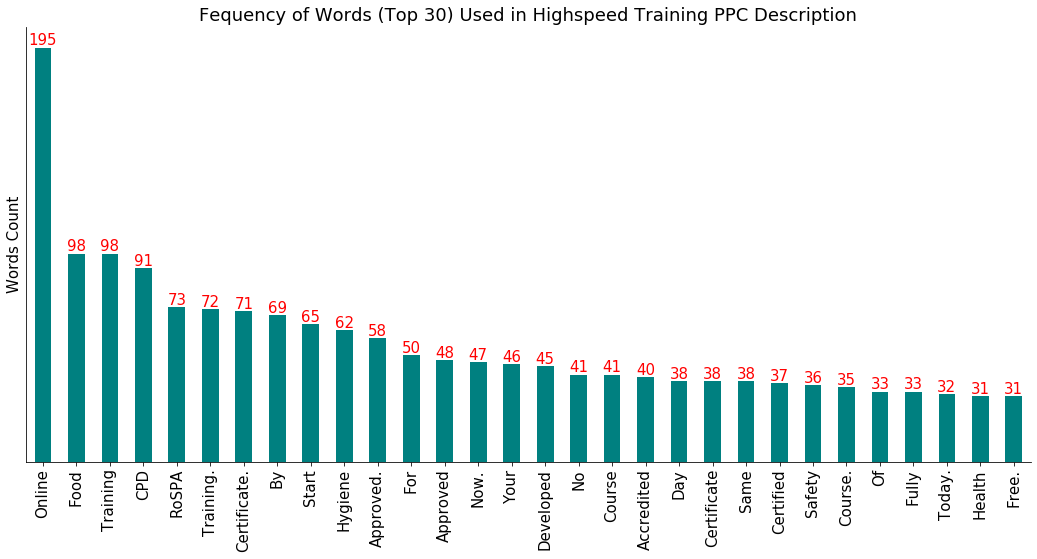

In [7]:
#Fequency of words in highspeed training ppc description
absolute_freq(df_h.des_stop.str.split(expand=True).stack(),'Fequency of Words (Top 30) Used in Highspeed Training PPC Description')

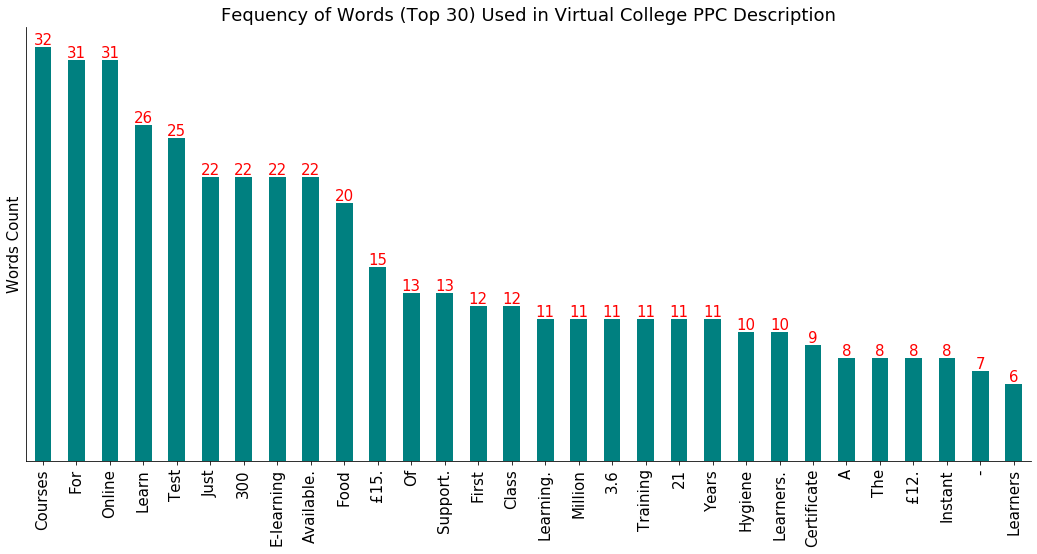

In [8]:
#Fequency of words in virtual college ppc description
absolute_freq(df_v.des_stop.str.split(expand=True).stack(),'Fequency of Words (Top 30) Used in Virtual College PPC Description')

In [9]:
# We can visualize those info using word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(25, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.title(title,fontsize=25)
    plt.show()

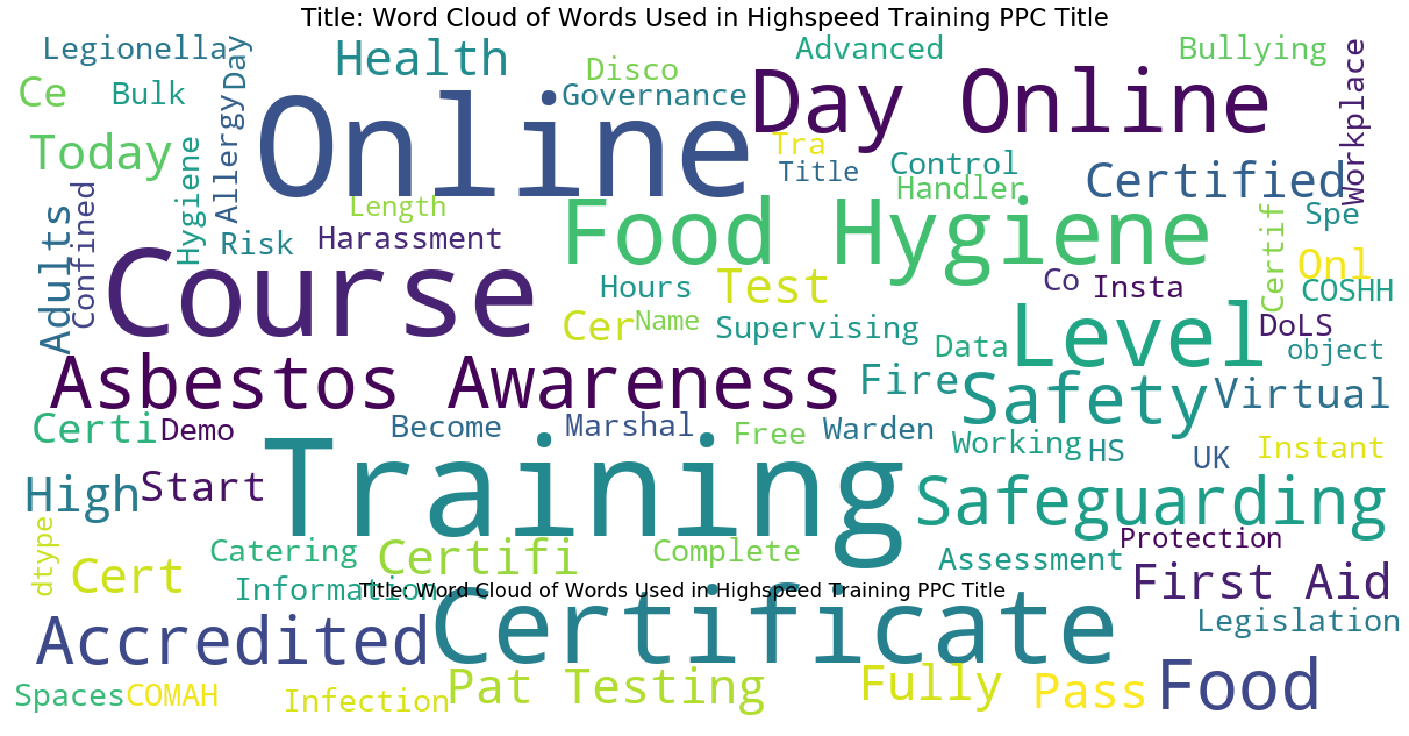

In [10]:
# Word clouds of highspeed training ppc title
show_wordcloud(df_h.Title,'Title: Word Cloud of Words Used in Highspeed Training PPC Title')

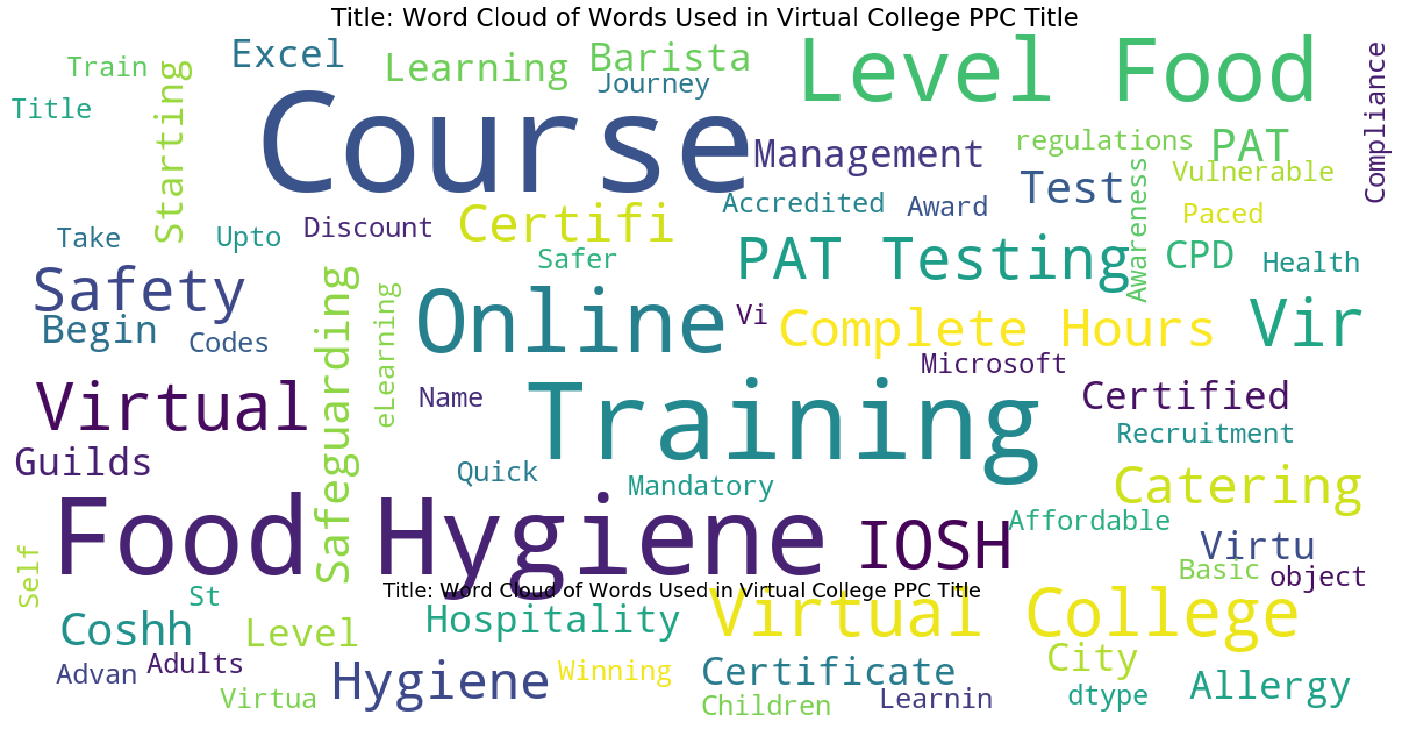

In [11]:
# Word clouds of virtual college ppc title
show_wordcloud(df_v.Title,'Title: Word Cloud of Words Used in Virtual College PPC Title')

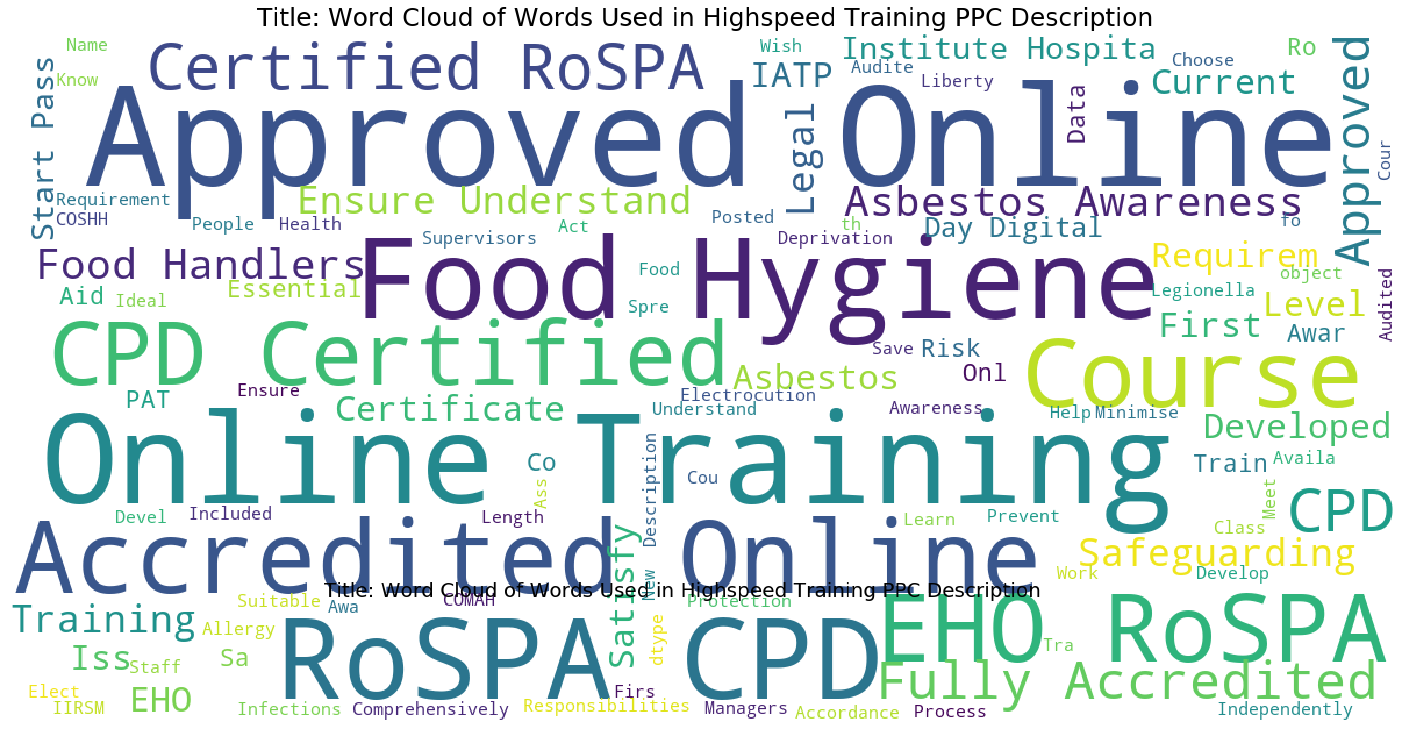

In [12]:
# Word clouds of highspeed training ppc description
show_wordcloud(df_h.Description,'Title: Word Cloud of Words Used in Highspeed Training PPC Description')

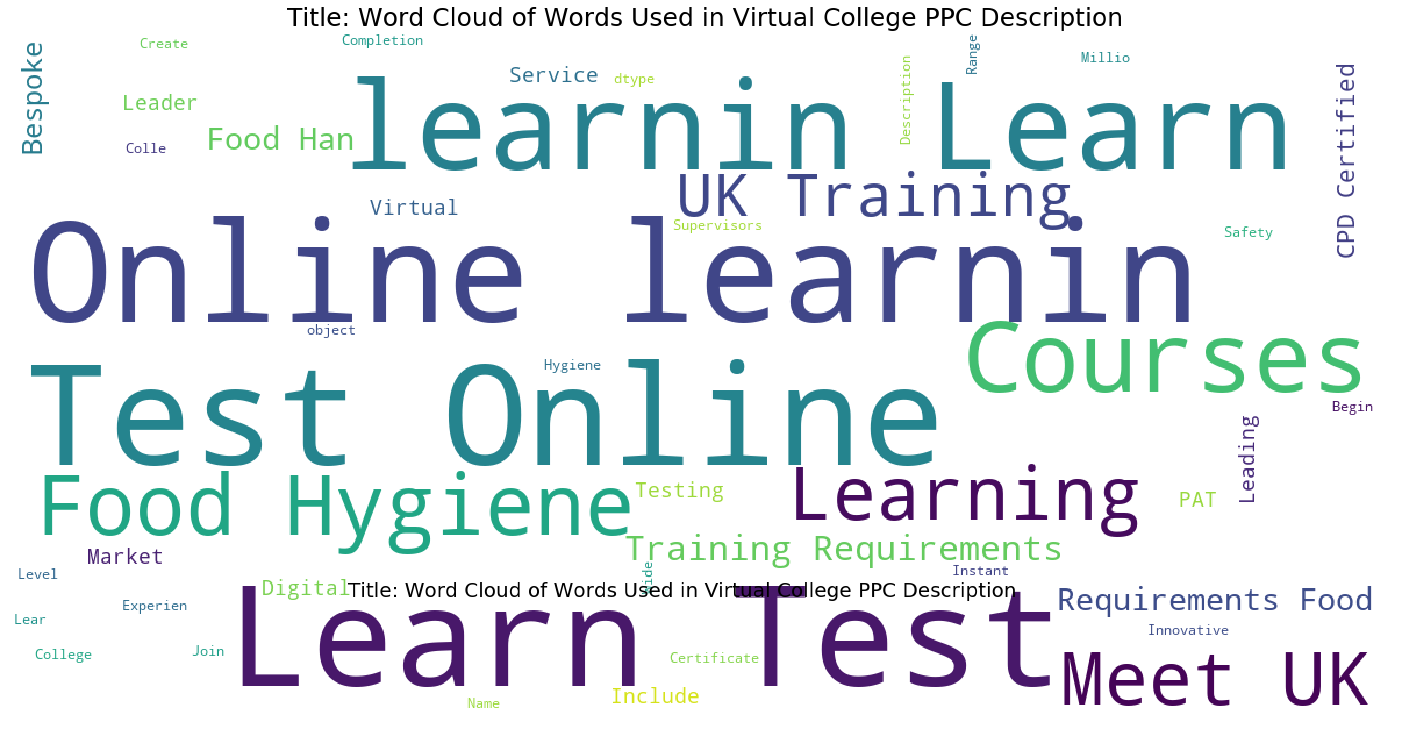

In [13]:
# Word clouds of virtual college ppc description
show_wordcloud(df_v.Description,'Title: Word Cloud of Words Used in Virtual College PPC Description')